<a href="https://colab.research.google.com/github/Thisen22/econometrics2-machine-learning/blob/main/lecture12_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

## 1. Introduction

A **Decision Tree** is a supervised machine learning algorithm used for both regression and classification tasks. In **regression**, the target variable is numerical, and the goal is to predict its value based on a set of independent variables (also known as predictors or features). Decision Trees build models by recursively splitting the data into smaller subsets, aiming to reduce the variability of the target variable in each split.

In this tutorial, we'll go through the steps of building a Decision Tree for regression using numerical dependent and independent variables.

#### Hands-On Project: **Energy Consumption**

Consider the following dataset where we want to predict **Energy Consumption** (kWh) based on **Temperature** and **Wind Speed**.

| Day | Temperature (°C) | Wind Speed (km/h) | Energy Consumption (kWh) |
|-----|------------------|-------------------|--------------------------|
| 1   | 15               | 12                | 400                      |
| 2   | 22               | 8                 | 350                      |
| 3   | 10               | 15                | 450                      |
| 4   | 30               | 5                 | 300                      |
| 5   | 25               | 10                | 320                      |
| 6   | 18               | 20                | 370                      |
| 7   | 35               | 3                 | 280                      |
| 8   | 12               | 25                | 500                      |
| 9   | 28               | 5                 | 310                      |
| 10  | 20               | 18                | 360                      |



### **Exercise 1: What type of machine learning problem does energy consumption data?**


![](https://raw.githubusercontent.com/HamidBekamiri/Econometrics-II/refs/heads/main/images/02_SML_DT_exercise1.png)

In [1]:
# Install the necessary packages if they are not already installed
if(!require(rpart)){
  install.packages("rpart")
}
if(!require(rpart.plot)){
  install.packages("rpart.plot")
}

Loading required package: rpart

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rpart.plot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call:
rpart(formula = EnergyConsumption ~ Temperature + WindSpeed, 
    data = data, method = "anova", control = control_params)
  n= 10 

          CP nsplit rel error    xerror      xstd
1 0.72967640      0 1.0000000 1.2345679 0.4828357
2 0.13047553      1 0.2703236 0.9560004 0.3408189
3 0.08632597      2 0.1398481 0.3402522 0.1368509
4 0.00100000      3 0.0535221 0.2878811 0.1368668

Variable importance
Temperature   WindSpeed 
         74          26 

Node number 1: 10 observations,    complexity param=0.7296764
  mean=364, MSE=4344 
  left son=2 (7 obs) right son=3 (3 obs)
  Primary splits:
      Temperature < 16.5 to the right, improve=0.7296764, (0 missing)
      WindSpeed   < 11   to the left,  improve=0.6224678, (0 missing)
  Surrogate splits:
      WindSpeed < 11   to the left,  agree=0.8, adj=0.333, (0 split)

Node number 2: 7 observations,    complexity param=0.1304755
  mean=327.1429, MSE=963.2653 
  left son=4 (4 obs) right son=5 (3 obs)
  Primary splits:
      Temperatu

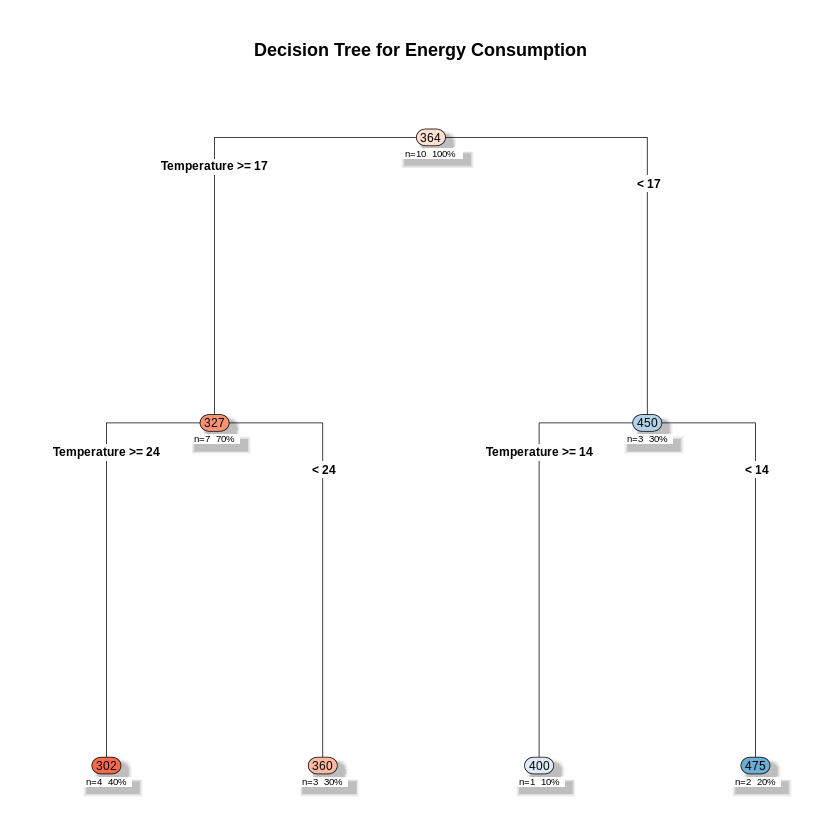

In [3]:
# Load necessary libraries
library(rpart)
library(rpart.plot)

# Define the data
data <- data.frame(
  Day = 1:10,
  Temperature = c(15, 22, 10, 30, 25, 18, 35, 12, 28, 20),
  WindSpeed = c(12, 8, 15, 5, 10, 20, 3, 25, 5, 18),
  EnergyConsumption = c(400, 350, 450, 300, 320, 370, 280, 500, 310, 360)
)

# Define control parameters for the tree to better handle the detailed splits
control_params <- rpart.control(minsplit = 2,          # Minimum number of observations to attempt a split
                                minbucket = 1,         # Minimum number of observations in any terminal <leaf> node
                                maxdepth = 2,          # Maximum depth of any node of the final tree, increased for more detail
                                cp = 0.001)            # Lower complexity parameter to allow more detailed splits

# Building the decision tree model
model <- rpart(EnergyConsumption ~ Temperature + WindSpeed, data = data, method = "anova", control = control_params)

# Plotting the decision tree
rpart.plot(model, type = 4, extra = 101, under = TRUE, cex = 0.6,
           main = "Decision Tree for Energy Consumption",
           fallen.leaves = TRUE,          # Position the leaves at the bottom of the graph
           branch = 1,                    # Shape of branches (1 = right-angle, 2 = slanted)
           box.palette = "RdBu",          # Color palette
           shadow.col = "gray",           # Shadow color for boxes
           border.col = "black")          # Border color for boxes

# Print the detailed summary of the tree
print(summary(model))

We can implement the ID3 Decision Tree (DT) algorithm based on these steps:

1.  **Calculate the Initial Standard Deviation of the Target Variable:** Compute the standard deviation (SD) of the target variable before any splits.

2.  **Split the Data Based on Each Possible Split and Calculate the Standard Deviation for Each Group:** For each split, divide the data into two groups and calculate the standard deviation for each group.

3.  **Calculate the Standard Deviation Reduction (SDR) for Each Split:** Use the SDR formula to compute how much the split reduces the variability (SD) in the target variable.

4.  **Choose the Split with the Highest SDR:** Compare the SDR for all splits and choose the one that maximizes the reduction in variability.

5.  **Recursively Repeat Steps 1-4 for Each Branch:** For each branch created by a split, repeat the process by identifying new possible splits and calculating the SDR, continuing until the stopping conditions are met, such as minimal variance reduction, a minimum number of samples in a node, or reaching the maximum tree depth.

------------------------------------------------------------------------

## 2. Key Concepts

-   **Standard Deviation (SD):** Measures the spread or variability of a numerical variable. In the context of Decision Trees, we calculate the standard deviation of the target variable to understand how much variability there is in the data.

    $$
    SD(Y) = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2}
    $$Where:

    -   $Y_i$ is each individual value of the target variable (e.g., Energy Consumption)

    -   $\bar{Y}$ is the mean of the target variable

    -   $n$ is the number of instances

-   **Standard Deviation Reduction (SDR):** A key metric used to determine the best attribute to split the data on. The goal is to reduce the standard deviation as much as possible by splitting the dataset into homogeneous groups. The split with the largest SDR is chosen.

    $$
    SDR = SD(Parent) - \left( \frac{n_1}{n} \cdot SD(Group \, 1) + \frac{n_2}{n} \cdot SD(Group \, 2) \right)
    $$

    Where:

    -   $SD(Parent)$ is the standard deviation of the target variable before the split

    -   $SD(Group \, 1)$ and $SD(Group \, 2)$ are the standard deviations of the two groups after splitting the data based on an attribute

    -   $n_1$ and $n_2$ are the number of instances in each group

    -   $n$ is the total number of instances

## 3. Step-by-Step Guide to Build a Decision Tree

### Step 1: **Calculate the Initial Standard Deviation of the Target Variable**

The first step in constructing a Decision Tree is to compute the **standard deviation** of the target variable, which represents the overall variability before any splits are made.

The formula for standard deviation (SD) is:

$$
SD(Y) = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2}
$$Where:

-   $Y_i$ is each individual value of the target variable (e.g., Energy Consumption)

-   $\bar{Y}$ is the mean of the target variable

-   $n$ is the number of instances

### To calculate the standard deviation of **Energy Consumption**:

1.  **Find the mean**:

$$
\bar{Y} = \frac{400 + 350 + 450 + 300 + 320 + 370 + 280 + 500 + 310 + 360}{10} = 364
$$

2.  **Apply the standard deviation formula**:

$$
SD(Y) = \sqrt{\frac{(400 - 364)^2 + (350 - 364)^2 + ... + (360 - 364)^2}{10 - 1}} = \sqrt{\frac{43540}{10 - 1}} \approx 69.56
$$

In [4]:
# Calculate the sample standard deviation (R uses n-1 by default)
sd(data$EnergyConsumption)

[1] 69.47422

### Step 2: **Split the Data Based on Each Possible Split and Calculate the Standard Deviation for Each Group**

We will now look at potential splits for **Temperature** and **Wind Speed for daily time series dataset**. For numerical variables, splits occur at the midpoints between consecutive values.

#### **Possible Splits for Temperature (°C):**

-   Split 1: **Temperature \<= 16.5°C** (between 15 and 18)

-   Split 2: **Temperature \<= 23.5°C** (between 22 and 25)

#### **Possible Splits for Wind Speed (km/h):**

-   Split 1: **Wind Speed \<= 6.5 km/h** (between 5 and 8)

-   Split 2: **Wind Speed \<= 13 km/h** (between 12 and 15)

### Split on Temperature:

#### Split 1: Temperature ≤ 16.5°C

**Group 1 (≤ 16.5°C)**: [400, 450, 500] → Energy Consumption

-   **Mean** $\bar{Y}_1$:

$$
\bar{Y}_1 = \frac{400 + 450 + 500}{3} = 450
$$

-   **Sample Standard Deviation** $SD_1$:

$$
SD_1 = \sqrt{\frac{(400 - 450)^2 + (450 - 450)^2 + (500 - 450)^2}{3 - 1}} = \sqrt{\frac{2500 + 0 + 2500}{2}} = \sqrt{\frac{5000}{2}} = \sqrt{2500} = 50
$$

------------------------------------------------------------------------

**Group 2 (\> 16.5°C)**: [350, 300, 320, 370, 280, 310, 360]

-   **Mean** $\bar{Y}_2$:

$$
\bar{Y}_2 = \frac{350 + 300 + 320 + 370 + 280 + 310 + 360}{7} = 327.14
$$

-   **Sample Standard Deviation** $SD_2$:

$$
SD_2 = \sqrt{\frac{(350 - 327.14)^2 + (300 - 327.14)^2 + (320 - 327.14)^2 + (370 - 327.14)^2 + (280 - 327.14)^2 + (310 - 327.14)^2 + (360 - 327.14)^2}{7 - 1}}
$$

$$
SD_2 = \sqrt{\frac{522.22 + 736.57 + 50.98 + 1836.73 + 2221.57 + 293.73 + 1079.82}{6}} = \sqrt{\frac{6741.62}{6}} = \sqrt{1123.60} \approx 33.52
$$

------------------------------------------------------------------------

In [5]:
colnames(data)

sd(data$EnergyConsumption[data$Temperature > 16.5])

sd(data$EnergyConsumption[data$Temperature <= 16.5])

[1] "Day"               "Temperature"       "WindSpeed"        
[4] "EnergyConsumption"

[1] 33.52327

[1] 50

### ***Exercise 2: Calculate the standard deviation for each group based on the possible split for Temperature ≤ 23.5***



In [6]:
sd(data$EnergyConsumption[data$Temperature > 23.5])
sd(data$EnergyConsumption[data$Temperature <= 23.5])

[1] 17.07825

[1] 58.90671


### Split on Wind Speed:

#### Split 3: Wind Speed ≤ 6.5 km/h

**Group 1 (≤ 6.5 km/h)**: [300, 280, 310] → Energy Consumption

-   **Mean** $\bar{Y}_1$:

$$
\bar{Y}_1 = \frac{300 + 280 + 310}{3} = 296.67
$$

-   **Sample Standard Deviation** $SD_1$:

$$
SD_1 = \sqrt{\frac{(300 - 296.67)^2 + (280 - 296.67)^2 + (310 - 296.67)^2}{3 - 1}} \approx 15.28
$$

------------------------------------------------------------------------

**Group 2 (\> 6.5 km/h)**: [400, 350, 450, 320, 370, 500, 360]

-   **Mean** $\bar{Y}_2$:

$$
\bar{Y}_2 = \frac{400 + 350 + 450 + 320 + 370 + 500 + 360}{7} = 392.86
$$

-   **Sample Standard Deviation** $SD_2$:

$$
SD_2 = \sqrt{\frac{(400 - 392.86)^2 + ... + (360 - 392.86)^2}{7 - 1}} \approx 62.64
$$


In [7]:
data$WindSpeed

sd(data$EnergyConsumption[data$WindSpeed <= 6.5])
sd(data$EnergyConsumption[data$WindSpeed > 6.5])

[1] 12  8 15  5 10 20  3 25  5 18

[1] 15.27525

[1] 62.64032

### **Exercise 3: Calculate the standard deviation for each group based on the possible split for Wind Speed ≤ 13 km/h**

In [11]:
data$EnergyConsumption[data$WindSpeed <= 13]

sd(data$EnergyConsumption[data$WindSpeed <= 13])
sd(data$EnergyConsumption[data$WindSpeed > 13])

[1] 400 350 300 320 280 310

[1] 42.73952

[1] 66.83313

[1] 400 350 300 320 280 310

[1] 42.73952

[1] 66.83313

------------------------------------------------------------------------

### Summary of Step 2:

| Split Condition         | Count | Mean Energy Consumption | Standard Deviation |
|---------------------|----------------|---------------------|----------------|
| Temperature \<= 16.5°C  | 3     | 450.00                  | 50.00              |
| Temperature \> 16.5°C   | 7     | 327.14                  | 33.52              |
| Temperature \<= 23.5°C  | 6     | 405.00                  | 58.91              |
| Temperature \> 23.5°C   | 4     | 302.50                  | 17.08              |
| Wind Speed \<= 6.5 km/h | 3     | 296.67                  | 15.28              |
| Wind Speed \> 6.5 km/h  | 7     | 392.86                  | 62.64              |
| Wind Speed \<= 13 km/h  | 6     | 358.33                  | 42.73              |
| Wind Speed \> 13 km/h   | 4     | 382.50                  | 66.83              |


### Step 3: **Calculate the Standard Deviation Reduction (SDR) for Each Split**

**SDR for Temperature \<= 16.5°C:**

$$
SDR = 69.56 - \left( \frac{3}{10} \cdot 50.00 + \frac{7}{10} \cdot 33.52 \right)
$$

$$
SDR = 69.56 - (15.00 + 23.46) = 69.56 - 38.46 = 31.01
$$

### **Exercise 4: Calculate the Standard Deviation Reduction (SDR) for the possible split at Temperature \<= 23.5°C**


![](https://raw.githubusercontent.com/HamidBekamiri/Econometrics-II/refs/heads/main/images/02_SML_DT_exercise4.png)

In [13]:
SDR = sd(data$EnergyConsumption) - (sd(data$EnergyConsumption[data$Temperature > 23.5])*4/10+sd(data$EnergyConsumption[data$Temperature <= 23.5])*6/10)
SDR

[1] 27.29889



**SDR for Wind Speed \<= 6.5 km/h:**

$$
SDR = 69.56 - \left( \frac{3}{10} \cdot 15.28 + \frac{7}{10} \cdot 62.64 \right)
$$

$$
SDR = 69.56 - (4.58 + 43.85) = 69.56 - 48.43 = 21.04
$$


***Exercise 5: Calculate the Standard Deviation Reduction (SDR) for the possible split at Wind Speed ≤ 13 km/h***

![](https://raw.githubusercontent.com/HamidBekamiri/Econometrics-II/refs/heads/main/images/02_SML_DT_exercise5.png)

In [14]:
sd(data$EnergyConsumption) - (sd(data$EnergyConsumption[data$WindSpeed <= 13])*6/10 + sd(data$EnergyConsumption[data$WindSpeed > 13]*4/10))

[1] 17.09725

### Step 4: **Choose the Split with the Highest SDR**

We now have the **Standard Deviation Reduction (SDR)** for all possible splits:

-   **Temperature \<= 16.5°C**: SDR = **31.01**

-   **Temperature \<= 23.5°C**: SDR =

-   **Wind Speed \<= 6.5 km/h**: SDR = **21.04**

-   **Wind Speed \<= 13 km/h**: SDR =

#### **Best Split**:

The split with the highest SDR is **Temperature \<= 16.5°C**, with an SDR of **31.01**. Therefore, we will choose **Temperature** as the first feature to split the dataset.

### Step 5: **Recursively Repeat Steps 2-4 for Each Branch**

Let’s say we set the maximum depth of the decision tree (DT) to 1, so the condition has been met!

## 4. Conclusion

In this tutorial, we walked through how to construct a Decision Tree for regression using numerical data. The key steps include calculating the standard deviation of the target variable, splitting the data on different attributes, and using Standard Deviation Reduction (SDR) to select the best splits. By continuing this process recursively, we can create a decision tree that predicts numerical outcomes with high accuracy.
